In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Ibm

/content/drive/MyDrive/Ibm


In [3]:
ls

flowers/  Flowers-Dataset/


In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

Image augmentation

In [5]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [6]:
train_generator = training_datagen.flow_from_directory(
	r"/content/drive/MyDrive/Ibm/flowers",
	target_size=(64,64),
	class_mode='categorical',
  batch_size=30)

Found 4327 images belonging to 5 classes.


Create model and add layers

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

Compiling and fitting model

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, steps_per_epoch=5, verbose = 1, validation_steps=3)

Epoch 1/25
5/5 [==============================] - 9s 2s/step - loss: 1.5446 - accuracy: 0.3867
Epoch 2/25
5/5 [==============================] - 9s 2s/step - loss: 1.3645 - accuracy: 0.4267
Epoch 3/25
5/5 [==============================] - 9s 2s/step - loss: 1.2215 - accuracy: 0.4800
Epoch 4/25
5/5 [==============================] - 9s 2s/step - loss: 1.1867 - accuracy: 0.4467
Epoch 5/25
5/5 [==============================] - 9s 2s/step - loss: 1.3113 - accuracy: 0.4333
Epoch 6/25
5/5 [==============================] - 10s 2s/step - loss: 1.1852 - accuracy: 0.5267
Epoch 7/25
5/5 [==============================] - 9s 2s/step - loss: 1.2911 - accuracy: 0.4867
Epoch 8/25
5/5 [==============================] - 8s 2s/step - loss: 1.2384 - accuracy: 0.4733
Epoch 9/25
5/5 [==============================] - 6s 1s/step - loss: 1.1748 - accuracy: 0.5512
Epoch 10/25
5/5 [==============================] - 8s 1s/step - loss: 1.2802 - accuracy: 0.5067
Epoch 11/25
5/5 [==============================]

Saving the model

In [10]:
cd /content/drive/MyDrive/Ibm

/content/drive/MyDrive/Ibm


In [11]:
model.save("flower_model.h5")

In [12]:
ls

flower_model.h5  flowers/  Flowers-Dataset/


Testing the model

In [13]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [14]:
models=load_model("/content/drive/MyDrive/Ibm/flower_model.h5")

In [15]:
img=image.load_img("/content/sunflower.jpg",target_size=(64,64))

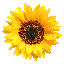

In [16]:
img

In [17]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=models.predict(x)

In [18]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [19]:
labels=["daisy"," dandelion","rose","sunflower","tulip"]
y=np.argmax(pred)

In [20]:
print(y)
print(labels[y])

3
sunflower
